In [10]:
import query
import pandas as pd 
import numpy as np
import sql_db
import operator
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

social = pd.read_sql_query(query.query, sql_db.conn)

print("dimensions", social.shape)

print("column names", social.columns)

#check for NA
print("total na", social.isnull().values.sum())

#remove NA
social = social.dropna()

#make sure no more NAs
print("total na after", social.isnull().values.sum())










dimensions (50000, 7)
column names Index(['region', 'activeupondischarge', 'patientunitstayid', 'gender', 'age',
       'ethnicity', 'unitdischargestatus'],
      dtype='object')
total na 410
total na after 0


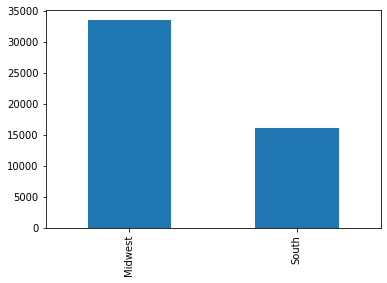

Midwest    33478
South      16112
Name: region, dtype: int64


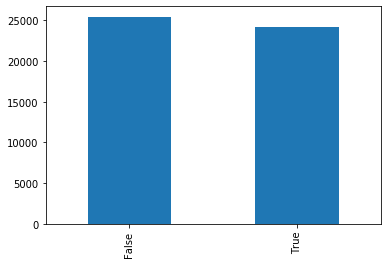

False    25433
True     24157
Name: activeupondischarge, dtype: int64


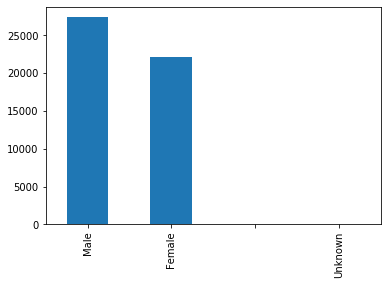

Male       27397
Female     22189
               3
Unknown        1
Name: gender, dtype: int64


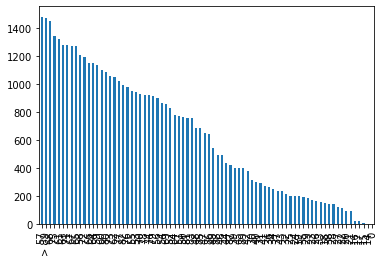

57      1484
> 89    1478
68      1453
75      1349
61      1327
        ... 
16        20
17        19
15         8
14         2
0          1
Name: age, Length: 78, dtype: int64


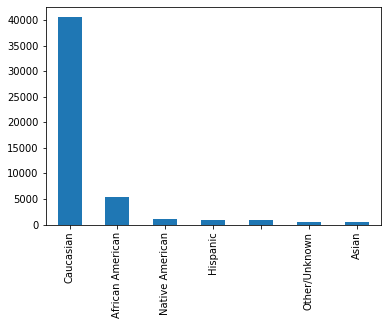

Caucasian           40491
African American     5308
Native American      1086
Hispanic              867
                      808
Other/Unknown         524
Asian                 506
Name: ethnicity, dtype: int64


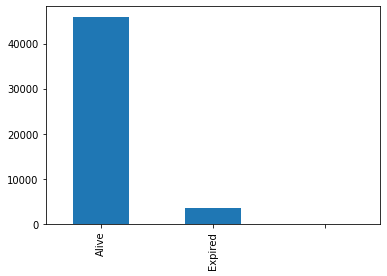

Alive      45959
Expired     3628
               3
Name: unitdischargestatus, dtype: int64


In [14]:


def get_value_counts(df):
    for (colname, colval) in df.iteritems():
        if colname != "patientunitstayid":
            df[colname].value_counts().plot(kind='bar')
            plt.show()
            print(df[colname].value_counts())


get_value_counts(social)
#separate minorities with caucasian


################################
CAUCASIANS
################################


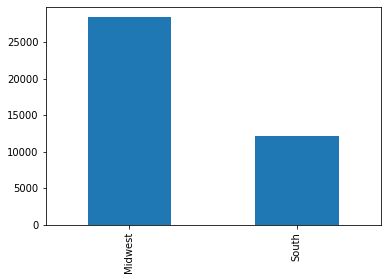

Midwest    28406
South      12085
Name: region, dtype: int64


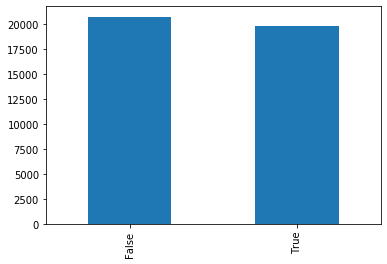

False    20695
True     19796
Name: activeupondischarge, dtype: int64


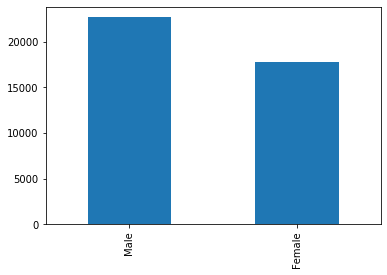

Male      22680
Female    17811
Name: gender, dtype: int64


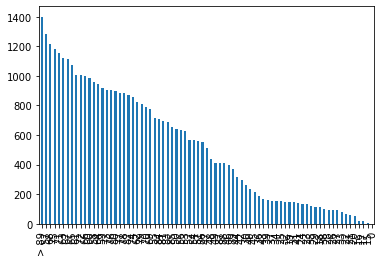

> 89    1400
57      1285
68      1216
75      1181
71      1156
        ... 
20        53
16        17
17        16
15         7
0          1
Name: age, Length: 77, dtype: int64


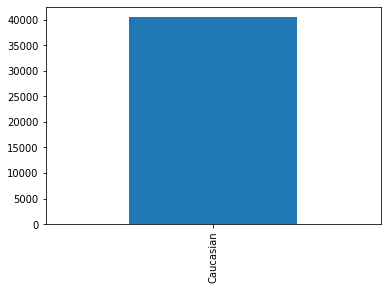

Caucasian    40491
Name: ethnicity, dtype: int64


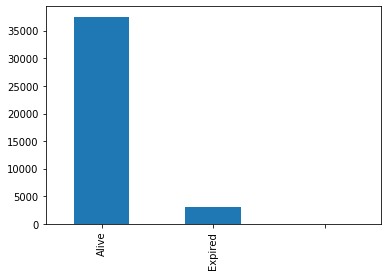

Alive      37510
Expired     2978
               3
Name: unitdischargestatus, dtype: int64


In [15]:

caucasian = social[social["ethnicity"] == "Caucasian"]


minorities = social[social["ethnicity"] != "Caucasian"]

print("################################")
print("CAUCASIANS")
print("################################")

get_value_counts(caucasian)


################################
MINORITIES
################################


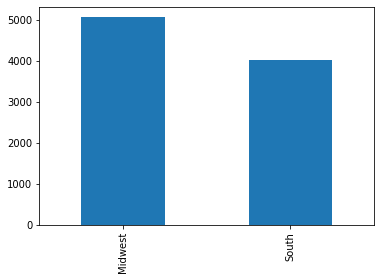

Midwest    5072
South      4027
Name: region, dtype: int64


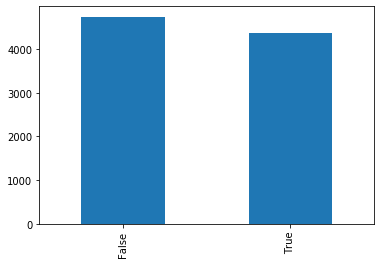

False    4738
True     4361
Name: activeupondischarge, dtype: int64


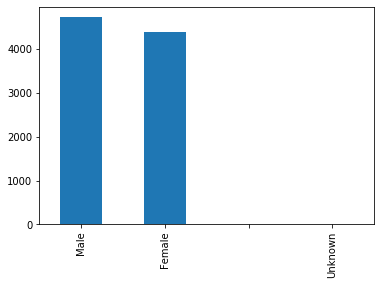

Male       4717
Female     4378
              3
Unknown       1
Name: gender, dtype: int64


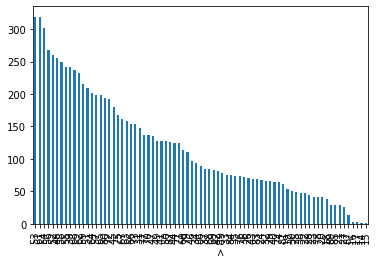

53    319
61    319
54    301
56    267
52    260
     ... 
87     14
16      3
17      3
14      2
15      1
Name: age, Length: 77, dtype: int64


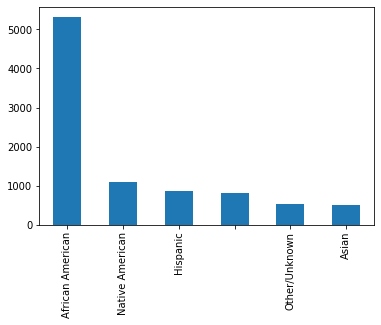

African American    5308
Native American     1086
Hispanic             867
                     808
Other/Unknown        524
Asian                506
Name: ethnicity, dtype: int64


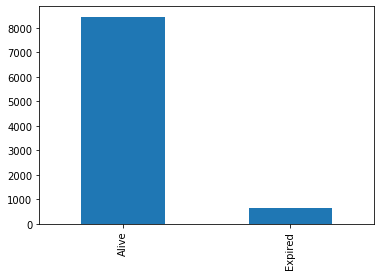

Alive      8449
Expired     650
Name: unitdischargestatus, dtype: int64


In [16]:
print("################################")
print("MINORITIES")
print("################################")

get_value_counts(minorities)


In [49]:
enc = OneHotEncoder(handle_unknown = 'ignore')

def onehotencoding_all(df):
    new_df = pd.DataFrame()
    for (colname, colval) in df.iteritems():
        if colname != "patientunitstayid" and colname != "age":
            enc_df = pd.DataFrame(enc.fit_transform(df[[colname]]).toarray(), columns = enc.get_feature_names())
            frames = [enc_df, new_df]
            new_df = pd.concat(frames, axis = 1)
    return new_df
            

caucasian_ohe = onehotencoding_all(caucasian)
minorities_ohe = onehotencoding_all(minorities)

In [42]:
minorities_ohe.head()

,x0_Alive,x0_Expired,x0_,x0_African American,x0_Asian,x0_Hispanic,x0_Native American,x0_Other/Unknown,x0_,x0_Female,x0_Male,x0_Unknown,x0_False,x0_True,x0_Midwest,x0_South
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [50]:
caucasian_ohe.head()

,x0_,x0_Alive,x0_Expired,x0_Caucasian,x0_Female,x0_Male,x0_False,x0_True,x0_Midwest,x0_South
0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


In [51]:
min_corr = minorities_ohe.corr()
cau_corr = caucasian_ohe.corr()

In [52]:
print(min_corr["x0_True"].sort_values(ascending = False))

x0_True                1.000000
x0_Midwest             0.262683
x0_Hispanic            0.160690
x0_Alive               0.029498
x0_                    0.029187
x0_Female              0.019680
x0_                    0.018930
x0_Unknown             0.010928
x0_Asian              -0.007216
x0_Male               -0.020597
x0_Other/Unknown      -0.028466
x0_Expired            -0.029498
x0_African American   -0.054010
x0_Native American    -0.063447
x0_South              -0.262683
x0_False              -1.000000
Name: x0_True, dtype: float64


In [53]:
print(cau_corr["x0_True"].sort_values(ascending = False))

x0_True         1.000000
x0_Midwest      0.181861
x0_Alive        0.076696
x0_Female       0.029484
x0_             0.008801
x0_Male        -0.029484
x0_Expired     -0.077022
x0_South       -0.181861
x0_False       -1.000000
x0_Caucasian         NaN
Name: x0_True, dtype: float64
